In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
%matplotlib inline

df = pd.read_csv('Churn_Modelling.csv')

In [2]:
df_rows = df.index.values
df_columns = df.columns
df_columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [3]:
cols = ['CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited']

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


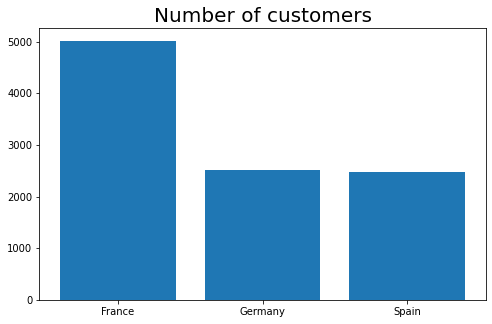

In [5]:
#Exercise 1: Number of customers in each country

plt.figure(figsize=(8,5))
plt.title("Number of customers", fontsize=20)
x = df['Geography'].value_counts().index
y = df['Geography'].value_counts().values #or df.Geography.value_counts().values

plt.bar(x, y)
plt.show()

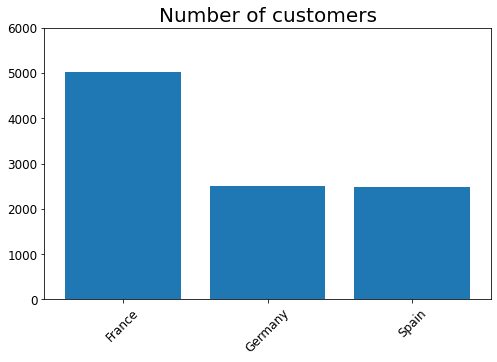

In [6]:
#Exercise 2:  Adjusting xticks and yticks 

plt.figure(figsize=(8,5))
plt.title("Number of customers", fontsize=20)
x = df['Geography'].value_counts().index
y = df['Geography'].value_counts().values

plt.bar(x,y)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, ticks=np.arange(0,7000, 1000))
plt.show()

In [7]:
#Exercise 3: Changing the default figure size 
%matplotlib inline
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [9]:
plt.rcParams.get('figure.figsize')  #matplotlib default figure size

[6.0, 4.0]

In [10]:
plt.rcParams['figure.figsize'] = (8,5)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

In [11]:
plt.rcParams.get('figure.figsize')

[8.0, 5.0]

In [22]:
df.Balance.values.min()

0.0

In [23]:
df.Balance.values.max()

250898.09

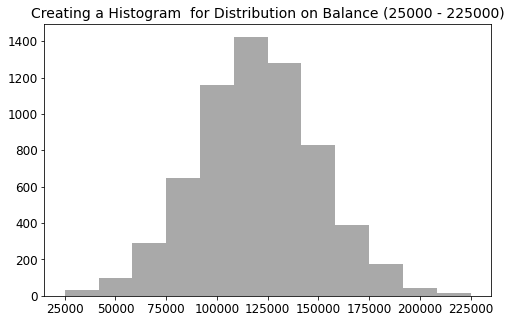

In [24]:
#Exercise 4: Creating a simple histogram 
plt.figure()
plt.title("Creating a Histogram  for Distribution on Balance (25000 - 225000)", fontsize=14)
x = df['Balance']
plt.hist(x, color="darkgrey", range=(25000,225000), bins=12)
plt.show()

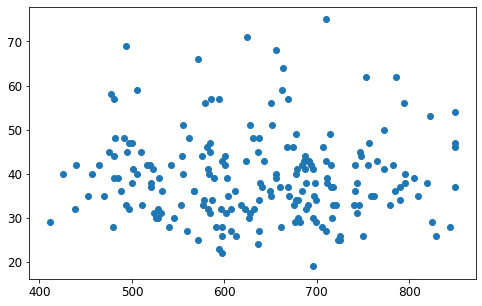

In [28]:
#Exercise 5: Creating a simple scatter plot 

sample = df.sample(n=200, random_state=42)
plt.scatter(x = sample['CreditScore'],y = sample['Age'])
plt.show()

#Note: from the below grapf, It seems like there is not a correlation between the age and credit score.

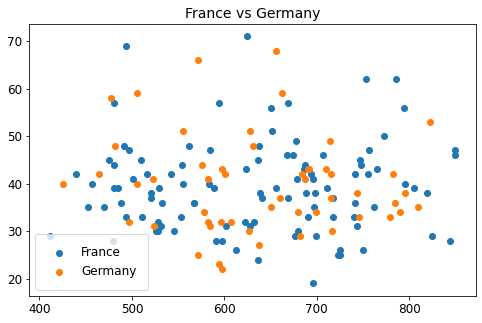

In [47]:
#Exercise 6: Scatter plots with subplots 
fig , ax = plt.subplots()
plt.title("France vs Germany", fontsize=14)

sample = df.sample(n=200, random_state=42)
x_france = sample[sample.Geography == 'France']['CreditScore']
y_france = sample[sample.Geography == 'France']['Age']

x_germany  = sample[sample.Geography == 'Germany']['CreditScore']
y_germany = sample[sample.Geography == 'Germany']['Age']

ax.scatter(x_france,y_france)
ax.scatter(x_germany, y_germany)
ax.legend(labels=['France','Germany'], loc='lower left', fontsize=12, borderpad=1)
plt.show()

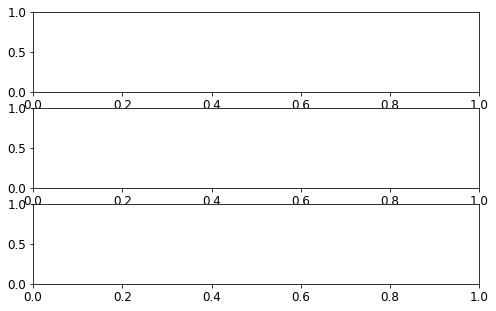

In [49]:
#Exercise 7: Grid of subplots 
fig, (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1)

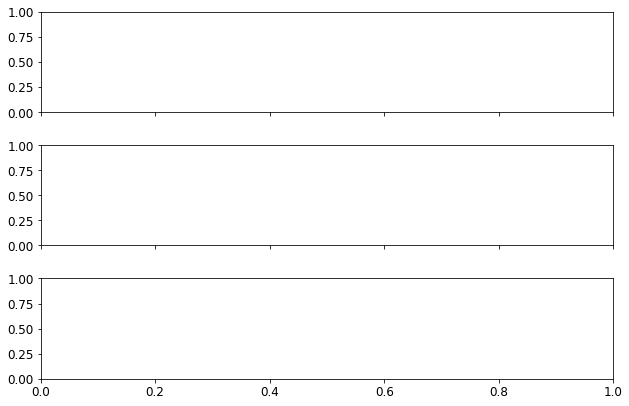

In [56]:
#Exercise 8: Rearranging and accessing the subplots
fig , (ax1,ax2,ax3) = plt.subplots(nrows=3, ncols=1, figsize=(9,6), sharex=True)
fig.tight_layout(pad=2)

Text(0.5, 1.0, 'Define Plot using indexing')

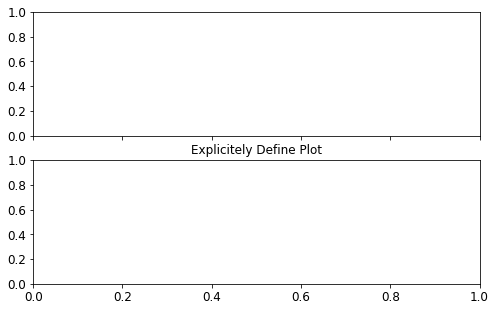

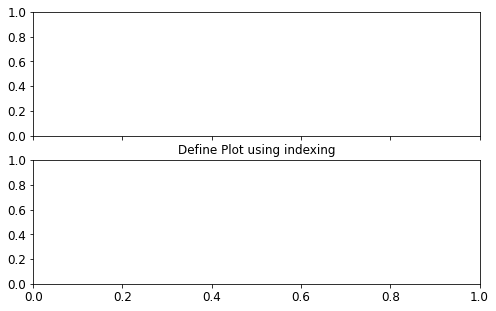

In [62]:
#There are two ways to access the subplots. One way is to define them explicitly and the other way is to use indexing.
#first Way:
fig , (ax1,ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)
plt.title("Explicitely Define Plot")
#first subplot = ax1 & second subplot = ax2

#second way
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True)
plt.title("Define Plot using indexing")
#first subplot = ax[0] & second subplot = ax[1]



Text(0.5, 1.0, 'Number of Products')

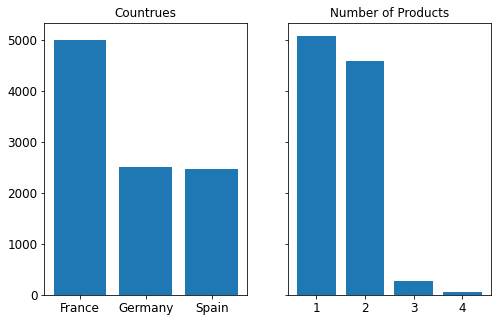

In [90]:
#Exercise 9: Drawing the subplots
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(8,5))
countries = df.Geography.value_counts()
products = df.NumOfProducts.value_counts()

ax1.bar(x=countries.index, height=countries.values)
ax1.set_title('Countrues', fontsize=12)

ax2.bar(x=products.index, height=products.values)
ax2.set_title("Number of Products", fontsize=12)

Text(0.5, 1.0, 'Number of Products')

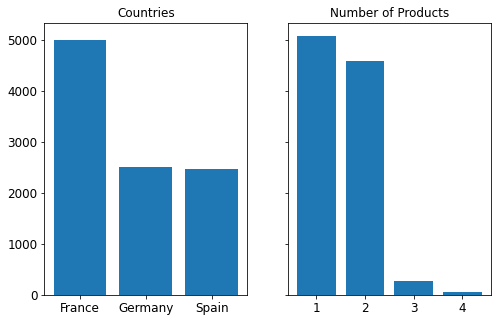

In [92]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True,
figsize=(8,5))

countries = df.Geography.value_counts()
products = df.NumOfProducts.value_counts()

ax1.bar(countries.index, countries.values)
ax1.set_title("Countries", fontsize=12)

ax2.bar(products.index, products.values)
ax2.set_title("Number of Products", fontsize=12)

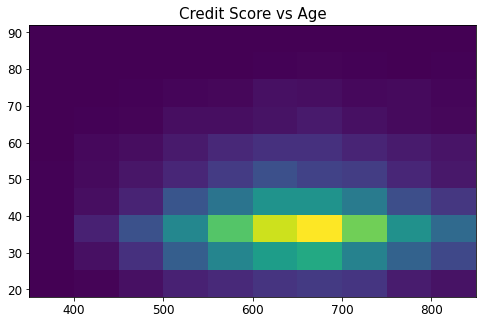

In [95]:
#Exercise 11:  Creating a 2-D histogram
plt.title("Credit Score vs Age", fontsize=15)
plt.hist2d(x=df.CreditScore, y=df.Age) 
plt.show()